# Загрузка и первый взгляд на данные

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import math as mth
import scipy.stats as st
import plotly.express as px
from plotly import graph_objects as go
from datetime import timedelta

In [2]:
# Чтение файлов
marketing_events = pd.read_csv("ab_project_marketing_events.csv")
events = pd.read_csv("final_ab_events.csv")
new_users = pd.read_csv("final_ab_new_users.csv")
participants = pd.read_csv("final_ab_participants.csv")

Для удобства переименуем столбец `name` в таблице `marketing_events`

In [3]:
marketing_events = marketing_events.rename(columns={'name':'name_event'})

Первый взгляд на данные

In [4]:
for df,name in zip([marketing_events, events, new_users, participants], 
                   ['marketing_events', 'events', 'new_users', 'participants']):
    df.name = name
    # Переведем название столбцов в нижний регистр
    df.columns = df.columns.str.lower()
    print('_' * 35 + f'{df.name}' + '_' * 35)
    display(df.head())
    print('-' * 75)
    df.info()
    print('-' * 75)
    # Проверка датафрейма на дубликаты
    if df.duplicated().sum() == 0:
        print(f'В датафрейме {name} дубликатов не обнаружено')
    else:
        print(f'В датафрейме {name} обнаружено {df.duplicated().sum()} дубликатов')

___________________________________marketing_events___________________________________


,name_event,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name_event  14 non-null     object
 1   regions     14 non-null     object
 2   start_dt    14 non-null     object
 3   finish_dt   14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
---------------------------------------------------------------------------
В датафрейме marketing_events дубликатов не обнаружено
___________________________________events___________________________________


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB
---------------------------------------------------------------------------
В датафрейме events дубликатов не обнаружено
___________________________________new_users___________________________________


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB
---------------------------------------------------------------------------
В датафрейме new_users дубликатов не обнаружено
___________________________________participants___________________________________


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB
---------------------------------------------------------------------------
В датафрейме participants дубликатов не обнаружено


## Вывод

Обнаружены следующие недостатки:
1. Неудобный формат дат
2. В датафрейме `events` в столбце `details` имеются пропущенные значения

# Обработка данных

Изменим формат дат

In [5]:
marketing_events['start_dt'] =  pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])

In [6]:
new_users['first_date'] = pd.to_datetime(new_users['first_date'])

In [7]:
events['event_dt'] = pd.to_datetime(events['event_dt'])
# Добавим столбец с датой без времени
events['date'] = pd.to_datetime(events['event_dt']).dt.date.astype('datetime64')

Разберемся с пропущенными значениями в таблице `events`.

1. Посморим на все события в этом столбце

In [8]:
events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

Можно предположить, что воронка событий в хронологическом порядке выглядит так:

1. `login` - регистрация
2. `product_page` - просмотр карточки товара
3. `product_cart` - добавление товара в корзину
4. `purchase` - оплата товара

2. Проверим в каких событиях имеются пропущенные значения

In [9]:
events[events['details'].isna()]['event_name'].unique()

array(['product_cart', 'product_page', 'login'], dtype=object)

3. Проверим в каких событиях значения заполнены

In [10]:
events[~ events['details'].isna()]['event_name'].unique()

array(['purchase'], dtype=object)

Пропущенные значение появились из за того, что в колонку `details` добавлялась оплата товара(событие `purchase`), а все остальные события заполнялись значением `NaN`

## Вывод

Нами проделано:
1. Изменен формат дат
2. Изучена природа пропуска данных в таблице `events`

# Оценка корректности проведения теста

## Проверка дат

Посморим первую и последнюю дату лога в таблице `events`.

In [11]:
print(f"Первый лог - {events['date'].min()}")
print(f"Крайний лог - {events['date'].max()}")

Первый лог - 2020-12-07 00:00:00
Крайний лог - 2020-12-30 00:00:00


В т.з. указан период теста с 2020-12-07 по 2021-01-04. Можно объяснить крайнюю запись лога, датированной 2020-12-30, тем что в этот период празднуется новый год и пользователи перестали заходить приложение или сайт. А период начала теста и первого лога совпадают

In [12]:
new_users.head(3)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC


Посмотрим на дату последней записи в таблице `new_users`

In [13]:
print(new_users['first_date'].min())
print(new_users['first_date'].max())

2020-12-07 00:00:00
2020-12-23 00:00:00


Видим, что у нас есть пару лишних дней(в тз 2020-12-21). Посчитаем в процентом соотношении сколько пользователей зарегестрировалось за эти два дня

In [14]:
len(new_users.query('first_date > "2020-12-21"')) / len(new_users) * 100

8.525424003369348

Получилось 8.5% таких пользователей. Так как таких пользователей не много и для соответствия тз - удалим этих пользователей

In [15]:
new_users = new_users.query('first_date <= "2020-12-21"')

## Аудитория

Посмотрим с каких регионов регистрировались пользователи

In [16]:
new_users['region'].unique()

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

Видим 5 регионов. В тз говорится только о ново-зарегестрировавшихся пользователях из Европы, следствено остальные регионы нам не нужны, но для начала посчитаем их количество в процентном соотношении

In [17]:
len(new_users[new_users['region'] == "EU"]) / len(new_users) * 100

74.97786435275367

25% пользователей не из европейского союза. Оставим пользователей только из EU т.к. остальные пользователи нам не понадобятся

In [18]:
new_users = new_users.query('region == "EU"')

## Пересекающиеся пользователи

Проверим наличие необходимого нам теста

In [19]:
duplicated_users = (
    participants.groupby('user_id')
    .agg(tests = ('ab_test', 'nunique'), tests_name = ('ab_test', 'unique'))
    .reset_index()
    .query('tests > 1')
)

# Посчитаем сколько таких пользователей
print(duplicated_users['tests'].count())

1602


Нашли 1602 пользователя которые по какой то причине попали в оба теста. Считаю нужным удалить этих пользователей т.к. тест `interface_eu_test`(скорей всего испытывали какой нибудь новый интерфейс) мог повлият на конверсию, что может сказаться на нашем иследовании

In [20]:
_ = duplicated_users["user_id"]
participants = participants.drop(index=participants.query('user_id in @_').index)

Оставим пользователей необходимого нам теста

In [21]:
participants = participants.query('ab_test == "recommender_system_test"')

Проверим, если пользователи которые попали в обе группы необходимого нам теста

In [22]:
duplicated_users = (
    participants.groupby('user_id')
    .agg(groups = ('group', 'nunique'), groups_name = ('group', 'unique'))
    .reset_index()
    .query('groups > 1')
)

# Посчитаем сколько таких пользователей
print(duplicated_users['groups'].count())

0


Таких пользователей не обнаружено

## Пункт о 15% новых пользователей из региона EU

Чтобы проверить этот пункт. Объединим две таблицы: `participants` и `new_users`

In [23]:
test_df = (participants[['user_id', 'group']]
           .merge(new_users[['user_id', 'first_date']],
                 how='left',
                 on='user_id'))
# для удобства переименуем столбец
test_df = test_df.rename(columns={'first_date':'reg_dt'})

Проверим есть ли пользователи которые отсутствуют в таблице `new_users`

In [24]:
test_df.isna().sum()

user_id      0
group        0
reg_dt     350
dtype: int64

Таких пользователей 350. Возможно эти пользователи были зарегестрированы раньше 2020-12-07 и из за этого не попали в датафрейм `new_users`. Так как их мало(примерно 7%) и они не вписываются в наше тз, считаю нужным удалить их

In [25]:
test_df = test_df.drop(index=test_df[test_df['reg_dt'].isna()].index)

Ответим на поставленный выше вопрос

In [26]:
print('Доля новых пользователей из региона EU составила: {0:.1%}'.format(len(test_df) / len(new_users)))

Доля новых пользователей из региона EU составила: 11.2%


In [27]:
print(f'Количество участников теста равно {len(test_df)}')

Количество участников теста равно 4749


## Время проведения теста

Проверим не совпадает ли время теста с маркетинговыми и другими активностями. Для этого Объединим две таблицы: `events` и `test_df`

In [28]:
test_df = test_df.merge(events[['user_id', 'date', 'event_name']], how='left', on='user_id')

Проверим пропуски

In [29]:
test_df.isna().sum()

user_id          0
group            0
reg_dt           0
date          2155
event_name    2155
dtype: int64

Причина пропусков может быть в том что, пользователи зарегестрировались(попали в датафрейм `new_users`) и не совершали больше ни каких действий и из за этого не попали в датафрейм `events`. Логично будет заполнить пропуски этих пользователей в столбце `event_name` на "login", а в столбце `date` указать дату регистрации

Для столбца `event_name`

In [30]:
test_df.loc[(test_df['event_name'].isna()), 'event_name'] = 'login'

Для столбца `date`

In [31]:
for user in test_df[test_df['date'].isna()]['user_id']:
    test_df.loc[(test_df['user_id'] == user), 'date'] = test_df[test_df['user_id'] == user]['reg_dt']

Построим матрицу лайнплотов с количесвтом событий по дням, а также обозначим граничные даты ивентов

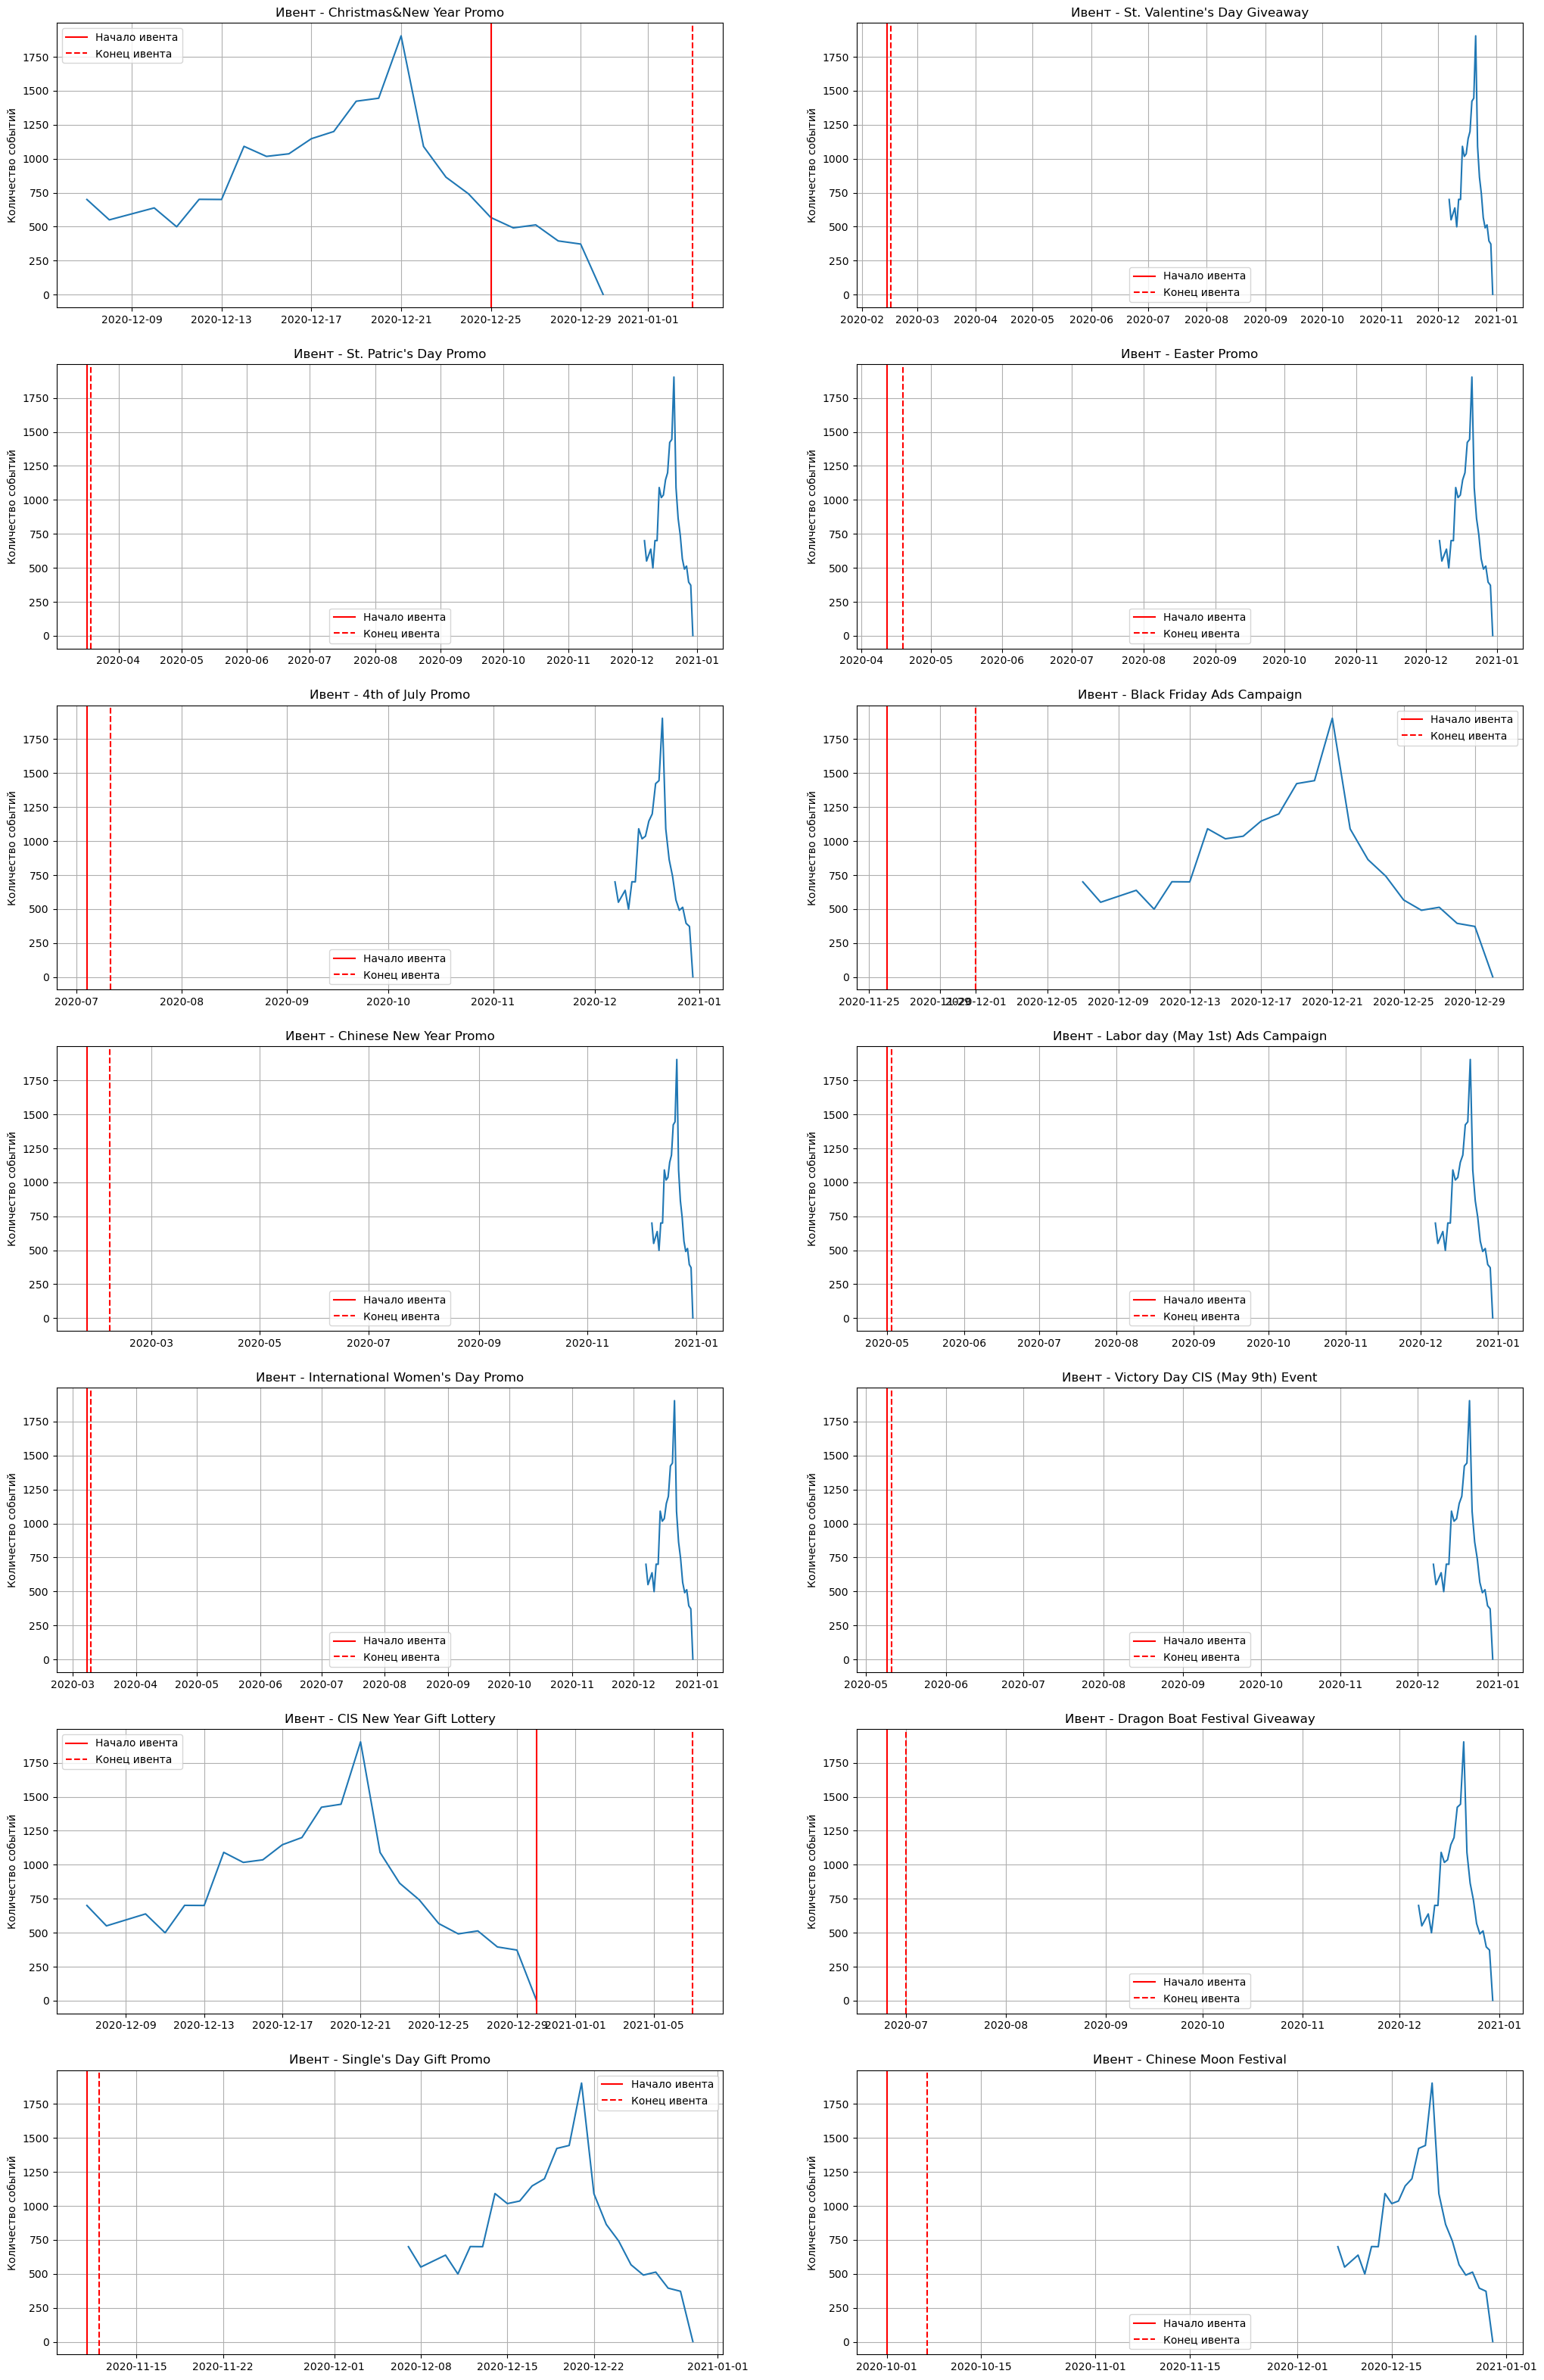

In [32]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(25, 40))

# посчитаем количество событий по дням
df = (
        pd.pivot_table(test_df, index='date', values='event_name', aggfunc='count')
    )
    

for ax,events in zip(axes.flat, marketing_events['name_event'].unique()):
    
    
    # построим лайнплот
    sns.lineplot(data=df, x='date', y='event_name', ax=ax)
    
    # построим граничные даты ивентов
    ax.axvline(marketing_events[marketing_events['name_event'] == events]['start_dt'], color='r', linestyle='-', label=f'Начало ивента')
    ax.axvline(marketing_events[marketing_events['name_event'] == events]['finish_dt'], color='r', linestyle='--', label=f'Конец ивента')
    
    # настроим маркеры
    ax.set(title=f'Ивент - {events}')
    ax.set_xlabel('')
    ax.tick_params(axis = 'x', labelsize=10)
    ax.set_ylabel('Количество событий')
    ax.legend()
    
    ax.grid(True)
    
plt.show()

Видим, что только один ивент(Christmas&New Year Promo) совпадает с периодом проведения теста. 

Можно заметить, что ни к какому росту активности пользоватлей, данный ивент не приводит. А наоборот активность пользователей снижается, но возможно связанно это(как и предпологалось ранее) с тем что, люди начинают праздновать новый год и не заходят в приложение или сайт. 

## Активность пользователей в период 14 дней

Посмотрим на события которые были совершены познее 14 дневного периода с момента регистрации

In [33]:
days = timedelta(days=14)

In [34]:
period = test_df[(test_df['reg_dt'] + days) <  test_df['date']]
period

,user_id,group,reg_dt,date,event_name
1,D1ABA3E2887B6A73,A,2020-12-07,2020-12-25,purchase
3,D1ABA3E2887B6A73,A,2020-12-07,2020-12-25,product_cart
5,D1ABA3E2887B6A73,A,2020-12-07,2020-12-25,product_page
7,D1ABA3E2887B6A73,A,2020-12-07,2020-12-25,login
38,92CB588012C10D3D,A,2020-12-09,2020-12-25,product_page
...,...,...,...,...,...
19501,DA111496CD9749B0,A,2020-12-08,2020-12-24,product_page
19505,DA111496CD9749B0,A,2020-12-08,2020-12-24,login
19550,89332BD0C491D0F8,A,2020-12-14,2020-12-29,purchase
19554,89332BD0C491D0F8,A,2020-12-14,2020-12-29,product_page


439 событий было совершено познее 14 дневного периода с момента регистрации. Посчитаем сколько пользователей, сгенерировали эти события(в процентном соотношении к числу всех пользоватлей)

In [35]:
len(period['user_id'].unique()) / len(test_df['user_id'].unique()) * 100

4.021899347230995

Получили 4% таких пользователей. Считаю логичным удалить именно пользователей

In [36]:
_ = period['user_id'].unique()
test_df = test_df.drop(index=test_df.query('user_id in @_').index)

## Равномерность распределения по группам 

Посчитаем количество пользователей в группах

In [37]:
count_user_group = test_df.groupby('group').agg(users=('user_id', 'nunique')).reset_index()
count_user_group

,group,users
0,A,2603
1,B,1955


Видим не равномерное распределение по группам и сделать мы с этим ничего не можем. Продлжим тест в таком виде и будем учитывать, что контрольная группа на 33% больше эксперементальной

## Вывод

Нами сделано:
1. Проверено соответствие данных требованиям технического задания 
2. Проверены пересекающие пользователи 
3. Проверена равномерность распределения пользователей по группам

В итоге:
1. Данные соотвествуют всем пунктам тз кроме:
    - Реальное количество участников теста(4749 пользователей) меньше на 21%, в отличии от ожидаемого(6000 пользователей)
    - Реальная доля новых пользователей из региона EU(11%) на 4% меньше в отличии от указаных в тз 15%
2. Найдены и удалены 1602 пересекающихся пользователя
3. Обнаружено не равномерное распределение по группам, разница между группами 33%. 

**Решено продолжить тест**

# Исследовательский анализ данных

## Количество событий на пользователя по группам

Построим две гистограммы с распределением количества событий на пользователя по группам

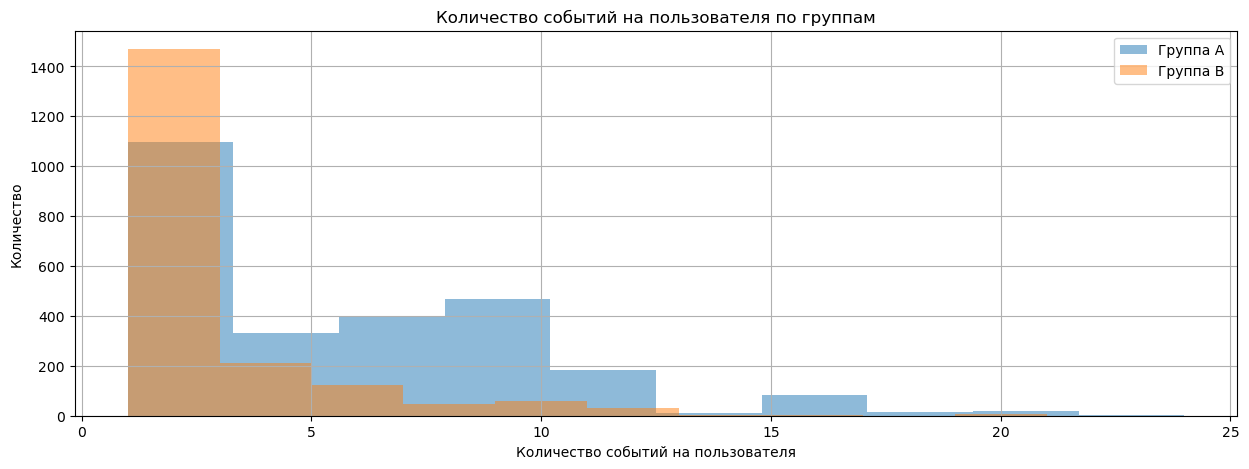

In [38]:
a_gr = (test_df.query('group == "A"')
        .groupby(by='user_id')
        .agg(count=('event_name', 'count'))
        .reset_index())

b_gr = (test_df.query('group == "B"')
        .groupby(by='user_id')
        .agg(count=('event_name', 'count'))
        .reset_index())

# построим гистограммы
figure(figsize=(15, 5))
a_gr['count'].hist(alpha=.5, label='Группа А')
b_gr['count'].hist(alpha=.5, label='Группа В')
plt.title('Количество событий на пользователя по группам')
plt.xlabel('Количество событий на пользователя')
plt.ylabel('Количество')
plt.legend()
plt.show()

Видим, что пользователи контрольной группы в среднем генерируют больше событий. 

1. В группе А - 88% пользователей совершают от 1 до 10 событий
2. В группе В - 86% пользователей совершают от 1 до 5 событий

## Число событий в выборках по дням

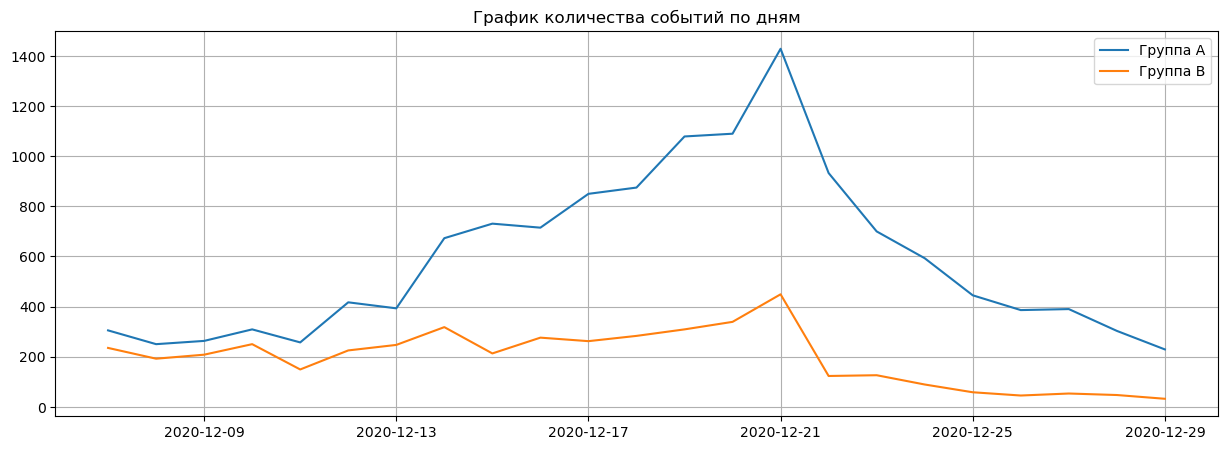

In [39]:
# датафрейм с количеством событий по дням в группе А
a_group = test_df.query('group == "A"').groupby(by='date').agg(count=('event_name', 'count')).reset_index()

# датафрейм с количеством событий по дням в группе B
b_group = test_df.query('group == "B"').groupby(by='date').agg(count=('event_name', 'count')).reset_index()
test_df
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества событий по дням')

# Строим график группы А
plt.plot(a_group['date'], a_group['count'], label='Группа A')

# Строим график группы B
plt.plot(b_group['date'], b_group['count'], label='Группа В')
plt.legend()
plt.show()

Видим что пользователи из группы А проявляют большую активность. 

Примерно до 2020-12-14 активность примерно одинакова(с упреждением на то что контрольная группа больше на 33%). В пиковом значении датированым 2020-12-21, активность пользователей группы А в 3,5 раза больше. Под конец теста активность контрольной группы примерно в 3 раза выше 

## Конверсия на разных этапах

Для начала создадим датафрейм с количеством пользователей по всем событиям, так же разделеных по группам

In [40]:
a_users = (
            test_df.query('group == "A"').groupby(['event_name'])
            .agg(a_users=('user_id', 'nunique'))
            .reset_index()
)
b_users = (
            test_df.query('group == "B"').groupby(['event_name'])
            .agg(b_users=('user_id', 'nunique'))
            .reset_index()
)

group_user = (
    a_users.merge(b_users, on='event_name')
             )

# добавим столбец с хронологическим порядком событий 
group_user['sequence'] = group_user['event_name'].map({'login': 1, 'product_page': 2, 'product_cart': 3, 'purchase': 4})

# отсортируем по возростанию
group_user = group_user.sort_values(by='sequence')   

In [41]:
group_user

,event_name,a_users,b_users,sequence
0,login,2603,1955,1
2,product_page,1193,323,2
1,product_cart,565,166,3
3,purchase,588,169,4


Построим воронку событий

In [42]:
# Построим воронку
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A',
    y = group_user['event_name'],
    x = group_user['a_users'],
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'B',
    orientation = "h",
    y = group_user['event_name'],
    x = group_user['b_users'],
    textposition = "inside",
    textinfo = "value+percent previous"))

fig.show()

Можно заметить одну особеность, что конверсия на шаге с `product_cart` на `purchase` равна 104% и связано это может быть, с тем что, пользователи не добавляют товар в корзину, а сразу оплачивают после просмотра карточки товара 

Разница конверсий:
1. Шаг с `login` на `product_page` - разница 29% в пользу контрольной группы. Даже с учетом того, что группа А на 33% больше, не думаю что ожидаемые 10% в пользу эксперементальной группы, здесь реальны.


2. Шаг с `product_page` на `product_cart` - разница 4% в пользу контрольной группы, тут скорей всего реальный исход может быть в пользу эксперементальной группы и возможно на ожидаемые 10%, если бы были равномерно распределены группы


3. Шаг с `product_page` на `purchase` - разница 2% в пользу контрольной группы, вывод такой же как и на шаге с `product_page` на `product_cart`

## Вывод

На данный момент эксперемент можно считать не удавшимся так как ни на одном событии(кроме последнего шага) не наблюдается улучение конверсии в ожидаемые 10%.

# Статистические тесты

Проверим, находят ли статистические критерии разницу между группами А и B

Для сравнения будем использовать тест Фишера или z-тест, так как нам придется сравнивать пропорций двух генеральных совокупностей по выборкам из них. 

За критический уровень статистической значимости примем величину 0.05

- Нулевая гипотеза - доли групп А и B - одинаковые
- Алтернативная - доли групп А и B - разные


Напишим функцию

In [43]:
alpha = .05 # критический уровень статистической значимости

In [44]:
def z_test(successes_a, trials_a, successes_b, trials_b):

    successes = np.array([successes_a, successes_b])
    trials = np.array([trials_a, trials_b])

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
    )

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    return(p_value)

In [45]:
# Создадим переменые с количесвтом всех уникальных пользователей по группам
a_all_users = test_df.query('group == "A"')['user_id'].nunique()
b_all_users = test_df.query('group == "B"')['user_id'].nunique()

Воспользуемся функцией. Первым параметрам передадим количесвто уникальных пользователей в группах, а вторым - количество уникальных пользователей из датафрейма `test_df`

In [46]:
_ = z_test(successes_a=a_all_users, #Количесвто уникальных пользователей группа А1
       trials_a=test_df['user_id'].nunique(), #Количесвто всех уникальных пользователей
       successes_b=b_all_users, #Количесвто уникальных пользователей группа А2
       trials_b=test_df['user_id'].nunique()) #Количесвто всех уникальных пользователей

print('p-значение: ', _)
if _ < alpha:
    print(f"Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print(
        f"Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод:** Группы имеют разные пропорции относительно всего объема данных

Чтоб протестировать все события, напишим функцию которая будет проводить z-test всех этапов воронки, в двух переданных в неё выборок

Нами выбран 5% уровень статистической значимости. Мы проведем 4 теста, при таком раскладе шанс совершить хотя бы одну ошибку первого рода равняется примерно 18%. Можно применить поравку Бонферрони - разделим alpha на количество тестов

In [47]:
alpha = .05 / 4

In [48]:
def get_p_value(group_a, group_b, all_users_a, all_users_b):
    '''Функция использует агрегированный датафрейм group_user'''
    for x in group_user.index:
        p_value = z_test(successes_a = group_user.loc[x, group_a],
                        trials_a =  all_users_a,
                        successes_b = group_user.loc[x, group_b],
                        trials_b = all_users_b)
        
        print('p-значение: ', p_value)
        if p_value < alpha:
            print(f"Отвергаем нулевую гипотезу: на этапе {group_user.loc[x, 'event_name']} между долями есть значимая разница")
        else:
            print(
        f"Не получилось отвергнуть нулевую гипотезу, на этапе {group_user.loc[x, 'event_name']} нет оснований считать доли разными"
    )

In [49]:
get_p_value(
    group_a='a_users',
    group_b='b_users',
    all_users_a=a_all_users,
    all_users_b=b_all_users
)

p-значение:  nan
Не получилось отвергнуть нулевую гипотезу, на этапе login нет оснований считать доли разными
p-значение:  0.0
Отвергаем нулевую гипотезу: на этапе product_page между долями есть значимая разница
p-значение:  0.0
Отвергаем нулевую гипотезу: на этапе product_cart между долями есть значимая разница
p-значение:  0.0
Отвергаем нулевую гипотезу: на этапе purchase между долями есть значимая разница


C:\Users\parna\AppData\Local\Temp\ipykernel_12652\1264613239.py:19: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\parna\AppData\Local\Temp\ipykernel_12652\1264613239.py:25: RuntimeWarning:

invalid value encountered in double_scalars



**На этапе `login` у нас получилось значение `nan` так как число уникальных пользователей и число зарегестрировавшихся пользователей совпадает**

**Вывод:** Группы имеют разные пропорции по всем событиям

# Вывод

Эксперемент можно считать не удавшимся так как ни на одном событии не наблюдается улучшение конверсии в ожидаемые 10%. Но результаты получились близкими и как все было бы при равном распределение по группам, мы увы незнаем. Стат.тесту верить в данной ситуации нельзя так как группы имеют разные пропорции относительно всего объема данных

**Рекомендация**

Повторить тестирование только уже с равномерным распределением по группам